In [65]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [66]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [67]:
# train_X = train_X.astype("float64")
# train_y = train_y.astype("float64")
# test_X = test_X.astype("float64")
# test_y = test_X.astype("float64")

In [68]:
test_X = test_X/255
train_X = train_X/255

In [69]:
train_X.shape, train_y.shape

((60000, 28, 28), (60000,))

In [70]:
train_X.T[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [71]:
def get_one_hot_y(y):
    output = []
    for i in range(y.shape[0]):
        tmp = np.array([0]*10)
        tmp[train_y[i]] = 1
        output.append(tmp)
    return np.array(output).T

def get_flatten_X(X):
    output = []
    for i in range(X.shape[0]):
        output.append(X[i].flatten())
    return np.array(output).T

In [72]:
train_y_onehot = get_one_hot_y(train_y)
train_X_flatten = get_flatten_X(train_X)
test_y_onehot = get_one_hot_y(test_y)
test_X_flatten = get_flatten_X(test_X)

In [73]:
train_y_onehot.shape, test_y_onehot.shape

((10, 60000), (10, 10000))

In [74]:
train_X_flatten.shape, test_X_flatten.shape

((784, 60000), (784, 10000))

Label: 0
Y onehot: [1 0 0 0 0 0 0 0 0 0]


<Figure size 432x288 with 0 Axes>

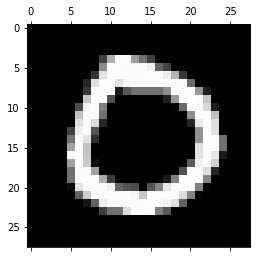

In [75]:
def plot_and_label_train_X(i):
    print("Label:", train_y[i])
    print("Y onehot:", train_y_onehot.T[i])
    plt.gray()
    plt.matshow(train_X[i])
    plt.show()

    # p = np.reshape(train_X_flatten.T[i].T,(28,28))
    # plt.gray()
    # plt.matshow(p)
    # plt.show()



plot_and_label_train_X(np.random.randint(0,1000))

In [76]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1-sigmoid(x))

def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A



In [77]:
# suppress warnings
#np.warnings.filterwarnings('ignore')


# init params
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

i = 0
m = 2

X = train_X_flatten.T[i:i+m].T # shape -> 784, m
Y = train_y_onehot.T[i:i+m].T

# forward prop
Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

# backward prop
dZ2 = A2-Y
dW2 = 1/m*dZ2@A1.T
db2 = 1/m*np.sum(dZ2)
dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
dW1 = 1/m*dZ1@X.T
db1 = 1/m*np.sum(dZ1)

# update poram
learning_rate = 0.2
W1 = W1 - learning_rate * dW1
b1 = b1 - learning_rate * db1    
W2 = W2 - learning_rate * dW2  
b2 = b2 - learning_rate * db2    

In [78]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [79]:
print(train_y.shape ,train_y_onehot.shape, train_X_flatten.shape)

(60000,) (10, 60000) (784, 60000)


In [80]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))


learning_rate = 0.1
iterations = 500

X = train_X_flatten # shape -> 784, m
Y = train_y_onehot
m = 60000

correct_predictions = 0
wrong_predictions = 0

for iter in range(iterations):
    # forward prop
    Z1 = W1@X+b1
    A1 = ReLU(Z1)
    Z2 = W2@A1+b2
    A2 = softmax(Z2)

    # backward prop
    dZ2 = A2-Y
    dW2 = 1/m*dZ2@A1.T
    db2 = 1/m*np.sum(dZ2)
    dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
    dW1 = 1/m*dZ1@X.T
    db1 = 1/m*np.sum(dZ1)

    # update poram
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1    
    W2 = W2 - learning_rate * dW2  
    b2 = b2 - learning_rate * db2    

    # accuracy
    if iter % 10 == 0 :
        # print(A2)
        print("Iteration: ", iter)
        predictions = get_predictions(A2)
        print(get_accuracy(predictions, train_y))


Iteration:  0
0.09476666666666667
Iteration:  10
0.15378333333333333
Iteration:  20
0.20518333333333333
Iteration:  30
0.2767833333333333
Iteration:  40
0.34723333333333334
Iteration:  50
0.40446666666666664
Iteration:  60
0.46623333333333333
Iteration:  70
0.5129333333333334
Iteration:  80
0.54725
Iteration:  90
0.5746
Iteration:  100
0.5983666666666667
Iteration:  110
0.6204833333333334
Iteration:  120
0.6427666666666667
Iteration:  130
0.6624833333333333
Iteration:  140
0.6787833333333333
Iteration:  150
0.6929
Iteration:  160
0.7055666666666667
Iteration:  170
0.7163666666666667
Iteration:  180
0.7268333333333333
Iteration:  190
0.7363
Iteration:  200
0.7446333333333334
Iteration:  210
0.75235
Iteration:  220
0.7593833333333333
Iteration:  230
0.7659833333333333
Iteration:  240
0.7720166666666667
Iteration:  250
0.7772666666666667
Iteration:  260
0.78255
Iteration:  270
0.78735
Iteration:  280
0.7917666666666666
Iteration:  290
0.7954
Iteration:  300
0.7988666666666666
Iteration:  

In [88]:

X = train_X_flatten.T[0:5000].T.shape
X
iterations = train_X_flatten.T.shape[0]/batch_size
iterations


12.0

## IMPLEMENTING EPOCH? BUT I DON'T KNOW HOW WOULD IT HELP? WHY NOT JUST USE ALL THE DATA AT ONCE

Decreasing the batch size during training of a neural network can have several potential benefits:

1- Reducing memory requirements: A smaller batch size means that fewer training examples are processed in each iteration, which can reduce the amount of memory required to store the training data and intermediate results. This can be important for training larger neural networks or when working with limited memory resources.

2- More frequent weight updates: A smaller batch size means that the neural network is updated more frequently during each epoch, which can help to speed up the training process and potentially lead to better convergence. With a larger batch size, the weight updates are less frequent, and the optimizer may take longer to converge to the optimal weights.

3- Improved generalization: Smaller batches can help to prevent the neural network from overfitting to the training data by introducing more randomness and variation into the training process. This can help the network to generalize better to new data and improve its performance on the validation and test sets.

However, decreasing the batch size may also have some potential drawbacks:

1- Slower training convergence: With smaller batch sizes, the optimization process may require more iterations or epochs to converge to the optimal weights, which can result in longer training times.

2- Noisier weight updates: With smaller batch sizes, the gradient estimates may be noisier and less accurate, which can lead to more unstable training and slower convergence. This can be mitigated by using techniques such as momentum or weight decay.

3- Overall, the optimal batch size will depend on the specific neural network architecture, dataset, and optimization algorithm used, and it may require experimentation and tuning to find the best value.






In [105]:

train_X_flatten.T.shape[0]//batch_size

5

In [111]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))



epochs = 500
batch_size = 60000//1
iterations = train_X_flatten.T.shape[0]//batch_size
learning_rate = 0.1

# m = batch_size
X = train_X_flatten # shape -> 784, m
Y = train_y_onehot # shape -< 10, m

for epoch in range(epochs):

    for iteration in range(iterations):

        X = train_X_flatten.T[(iteration*batch_size):(iteration+1)*batch_size].T
        Y = train_y_onehot.T[(iteration*batch_size):(iteration+1)*batch_size].T
        # print(iter*batch_size)
        # forward prop
        Z1 = W1@X+b1
        A1 = ReLU(Z1)
        Z2 = W2@A1+b2
        A2 = softmax(Z2)

        # backward prop
        dZ2 = A2-Y
        dW2 = 1/m*dZ2@A1.T
        db2 = 1/m*np.sum(dZ2)
        dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
        dW1 = 1/m*dZ1@X.T
        db1 = 1/m*np.sum(dZ1)

        # update poram
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1    
        W2 = W2 - learning_rate * dW2  
        b2 = b2 - learning_rate * db2    

        # accuracy
        if iteration % 1 == 0 :
            # print(A2)
            print("Epoch:", epoch, " Iteration:", iteration)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, train_y.T[(iteration*batch_size):(iteration+1)*batch_size].T))



Epoch: 0  Iteration: 0
0.11436666666666667
Epoch: 1  Iteration: 0
0.12951666666666667
Epoch: 2  Iteration: 0
0.13766666666666666
Epoch: 3  Iteration: 0
0.14471666666666666
Epoch: 4  Iteration: 0
0.15291666666666667
Epoch: 5  Iteration: 0
0.1589
Epoch: 6  Iteration: 0
0.1662
Epoch: 7  Iteration: 0
0.17438333333333333
Epoch: 8  Iteration: 0
0.18336666666666668
Epoch: 9  Iteration: 0
0.19521666666666668
Epoch: 10  Iteration: 0
0.2063
Epoch: 11  Iteration: 0
0.21646666666666667
Epoch: 12  Iteration: 0
0.22673333333333334
Epoch: 13  Iteration: 0
0.23643333333333333
Epoch: 14  Iteration: 0
0.24606666666666666
Epoch: 15  Iteration: 0
0.2543
Epoch: 16  Iteration: 0
0.26271666666666665
Epoch: 17  Iteration: 0
0.2702333333333333
Epoch: 18  Iteration: 0
0.2768333333333333
Epoch: 19  Iteration: 0
0.2831166666666667
Epoch: 20  Iteration: 0
0.28995
Epoch: 21  Iteration: 0
0.2966666666666667
Epoch: 22  Iteration: 0
0.3022666666666667
Epoch: 23  Iteration: 0
0.3093
Epoch: 24  Iteration: 0
0.31535
Epoc

In [ ]:
train_X_flatten.T[0:1].T.shape

In [ ]:
# index = 5151
index = np.random.randint(0,1000)
#plot_and_label_train_X(index)

X = train_X_flatten.T[index:index+1].T
y = train_y_onehot.T[index:index+1].T


Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = softmax(Z2)

# print(Z1.shape, W1.shape, X.shape) # -> HOW????
print(np.argmax(A2), np.argmax(y))


In [ ]:
W1 = np.random.uniform(-0.5, 0.5, (10,784))
b1 = np.random.uniform(-0.5, 0.5, (10,1))
W2 = np.random.uniform(-0.5, 0.5, (10,10))
b2 = np.random.uniform(-0.5, 0.5, (10,1))

learning_rate = 0.05
iterations = 100



m = 20000
for i in range(0,60000, m):
    X = train_X_flatten.T[i:i+m].T # shape -> 784, m
    Y = train_y_onehot.T[i:i+m].T
    print(i)
    for iter in range(iterations):
        # forward prop
        Z1 = W1@X+b1
        A1 = ReLU(Z1)
        Z2 = W2@A1+b2
        A2 = softmax(Z2)

        # backward prop
        dZ2 = A2-Y            
        dW2 = 1/m*dZ2@A1.T
        db2 = 1/m*np.sum(dZ2)
        dZ1 = W2.T@dZ2 * ReLU_deriv(Z1)
        dW1 = 1/m*dZ1@X.T
        db1 = 1/m*np.sum(dZ1)

        # update poram
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1    
        W2 = W2 - learning_rate * dW2  
        b2 = b2 - learning_rate * db2    

       # accuracy
        if iter % 10 == 0 :
            # print(A2)
            print("Iteration: ", iter)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, train_y))


In [ ]:
index = np.random.randint(0,1000)
plot_and_label_train_X(index)

X = train_X_flatten.T[index:index+1].T # shape -> 784, m
Y = train_y_onehot.T[index:index+1].T

#print(X.shape)
Z1 = W1@X+b1
A1 = ReLU(Z1)
Z2 = W2@A1+b2
A2 = ReLU(Z2)
print(A2.T[0])
print("guess: ", np.argmax(A2.T[0]), "| certainty: " ,np.max(A2.T[0]) )


In [ ]:
from nnfs.datasets import spiral_data

spiral_data